In [1]:
"""
This module implements training and evaluation of a multi-layer perceptron in NumPy.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import os
from mlp_numpy import MLP
import cifar10_utils_py2
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

import time
import sys
import pickle



In [2]:
# Default constants
LEARNING_RATE_DEFAULT = 2e-3
WEIGHT_REGULARIZER_STRENGTH_DEFAULT = 0.
WEIGHT_INITIALIZATION_SCALE_DEFAULT = 1e-4
BATCH_SIZE_DEFAULT = 200
MAX_STEPS_DEFAULT = 1500
DNN_HIDDEN_UNITS_DEFAULT = '100'

# Directory in which cifar data is saved
DATA_DIR_DEFAULT = './cifar10/cifar-10-batches-py'
LOG_DIR = './logs/cifar10/mlp_numpy/'
MODEL_FOLDER = ''

FLAGS = None

In [4]:
def train():
    """
    Performs training and evaluation of MLP model. Evaluate your model on the whole test set each 100 iterations.
    """
    ### DO NOT CHANGE SEEDS!
    # Set the random seeds for reproducibility
    np.random.seed(42)
 

    FLAGS.dnn_hidden_units = '300,100'
    FLAGS.weight_init_scale = 0.001
#     FLAGS.weight_reg_strength = 10
#     FLAGS.learning_rate = 0.1
    FLAGS.max_steps = 5000
    
    
    ## Prepare all functions
    # Get number of units in each hidden layer specified in the string such as 100,100
    if FLAGS.dnn_hidden_units:
        dnn_hidden_units = FLAGS.dnn_hidden_units.split(",")
        dnn_hidden_units = [int(dnn_hidden_unit_) for dnn_hidden_unit_ in dnn_hidden_units]
    else:
        dnn_hidden_units = []

    train_cifar = True

    if train_cifar:
        dataset = cifar10_utils_py2.get_cifar10(FLAGS.data_dir)
        n_input = 3072
        n_classes = 10
        norm_const = 1
    else:
        dataset = input_data.read_data_sets('MNIST_data', one_hot=True)
        n_input = 784
        n_classes = 10
        norm_const = 1
        
        
    #SAVE FLAGS TO A FILE
    MODEL_FOLDER = LOG_DIR + 'mlp_numpy_' + time.strftime("%Y%m%d-%H%M") + '/'
    
    
    if not os.path.exists(os.path.dirname(MODEL_FOLDER)):
        try:
            os.makedirs(os.path.dirname(MODEL_FOLDER))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
    file = open(MODEL_FOLDER + 'flags.txt', 'w+')
    for key, value in vars(FLAGS).items():
        file.write(key + ' : ' + str(value) + '\n')
    file.close()
    
    test_results = []



    mlp = MLP(n_input, dnn_hidden_units, n_classes,
            weight_decay=FLAGS.weight_reg_strength,
            weight_scale=FLAGS.weight_init_scale)

    np.set_printoptions(threshold= np.nan)

    for step in range(FLAGS.max_steps):
        x, y = dataset.train.next_batch(FLAGS.batch_size)
        x = np.reshape(x, (-1, n_input))  / norm_const

        logits = mlp.inference(x)


        loss, full_loss = mlp.loss(logits, y)
        mlp.train_step(full_loss, FLAGS)

        if step % 100 == 0:
            x = dataset.test.images
            x = np.reshape(x, (-1, n_input)) / norm_const
            y = dataset.test.labels

            logits = mlp.inference(x)
            loss, full_loss = mlp.loss(logits, y)
            acc =  mlp.accuracy(logits, y)
            print('step %d: loss: %f, %f, acc: %f' % (step, loss, full_loss,acc))
            
            test_results.append((step, full_loss, acc)) 

    #Evaluate on test set after the training has finished
    x = dataset.test.images / norm_const
    x = np.reshape(x, (-1, n_input))
    y = dataset.test.labels

    logits = mlp.inference(x)
    L, _ = mlp.loss(logits, y)
    print('test:', L, mlp.accuracy(logits, y))
    
    test_results.append((FLAGS.max_steps, full_loss, acc))  
    
    #Save results to file
    with open(MODEL_FOLDER + 'results.pkl', 'wb') as fp:
        pickle.dump(test_results, fp)
        
    print('results saved on: ' + MODEL_FOLDER)



def print_flags():
  """
  Prints all entries in FLAGS variable.
  """
  for key, value in vars(FLAGS).items():
    print(key + ' : ' + str(value))

def main():
    """
    Main function
    """
    # Print all Flags to confirm parameter settings
    print_flags()

    if not os.path.exists(FLAGS.data_dir):
        os.makedirs(FLAGS.data_dir)

    # Run the training operation
 
    train()

  

parser = argparse.ArgumentParser()
parser.add_argument('--dnn_hidden_units', type = str, default = DNN_HIDDEN_UNITS_DEFAULT,
                  help='Comma separated list of number of units in each hidden layer')
parser.add_argument('--learning_rate', type = float, default = LEARNING_RATE_DEFAULT,
                  help='Learning rate')
parser.add_argument('--max_steps', type = int, default = MAX_STEPS_DEFAULT,
                  help='Number of steps to run trainer.')
parser.add_argument('--batch_size', type = int, default = BATCH_SIZE_DEFAULT,
                  help='Batch size to run trainer.')
parser.add_argument('--weight_init_scale', type = float, default = WEIGHT_INITIALIZATION_SCALE_DEFAULT,
                  help='Weight initialization scale (e.g. std of a Gaussian).')
parser.add_argument('--weight_reg_strength', type = float, default = WEIGHT_REGULARIZER_STRENGTH_DEFAULT,
                  help='Regularizer strength for weights of fully-connected layers.')
parser.add_argument('--data_dir', type = str, default = DATA_DIR_DEFAULT,
                  help='Directory for storing input data')
FLAGS, unparsed = parser.parse_known_args()


main()


weight_init_scale : 0.0001
data_dir : ./cifar10/cifar-10-batches-py
learning_rate : 0.002
batch_size : 200
weight_reg_strength : 0.0
dnn_hidden_units : 100
max_steps : 1500
step 0: loss: 2.302558, 2.302558, acc: 0.117800
step 100: loss: 2.302404, 2.302404, acc: 0.177100
step 200: loss: 2.302058, 2.302058, acc: 0.199300
step 300: loss: 2.300617, 2.300617, acc: 0.180900
step 400: loss: 2.280159, 2.280159, acc: 0.158100
step 500: loss: 2.190483, 2.190483, acc: 0.168700
step 600: loss: 2.116139, 2.116139, acc: 0.182600
step 700: loss: 2.052121, 2.052121, acc: 0.232800
step 800: loss: 1.967828, 1.967828, acc: 0.257900
step 900: loss: 1.909998, 1.909998, acc: 0.274300
step 1000: loss: 1.871497, 1.871497, acc: 0.298600
step 1100: loss: 1.830336, 1.830336, acc: 0.319100
step 1200: loss: 1.793357, 1.793357, acc: 0.340000
step 1300: loss: 1.753713, 1.753713, acc: 0.355600
step 1400: loss: 1.725123, 1.725123, acc: 0.365600
step 1500: loss: 1.688666, 1.688666, acc: 0.382800
step 1600: loss: 1.6576

### plot stuff

In [26]:

import matplotlib.pyplot as plt
%matplotlib inline  

In [60]:


def plot(folder_names, legend_names):
    
    all_results = []
    
    x_ranges = []
    
    losses = []
    accuracies = []
    
    for i in range(len(folder_names)):
        
        with open (folder_names[i] + 'results.pkl', 'rb') as fp:
            model_results = pickle.load(fp)
            
            x_range, loss, acc = zip(*model_results)
            
            x_ranges.append(x_range)
            losses.append(loss)
            accuracies.append(acc)
            
             
                
      
    for i in range(len(x_ranges)):
        plt.plot(x_ranges[i], losses[i])
        
    plt.xlabel('Training step')
    plt.ylabel('Loss')
    plt.legend(legend_names)
    plt.show()
    
    for i in range(len(x_ranges)):
        plt.plot(x_ranges[i], accuracies[i]) 
    plt.xlabel('Training step')
    plt.ylabel('Accuracy')
    plt.legend(legend_names)
    plt.show()
#     for i in range(len(x_ranges)):
        
#         plt.plot(x_ranges, losses)
    
    

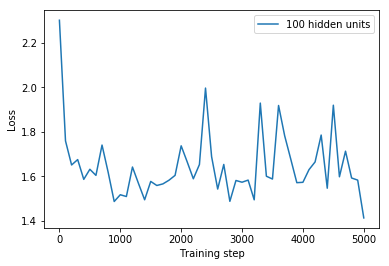

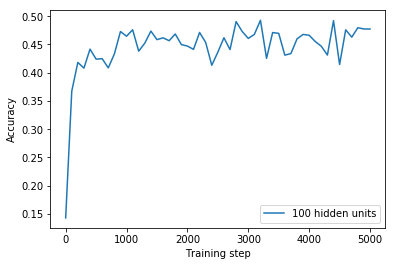

In [61]:
#Hidden units
folder_names = [LOG_DIR + 'mlp_numpy_20171112-1358/']

legend_names = ['100 hidden units']

plot(folder_names, legend_names)


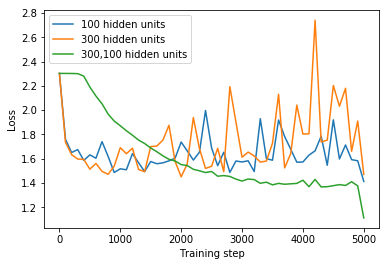

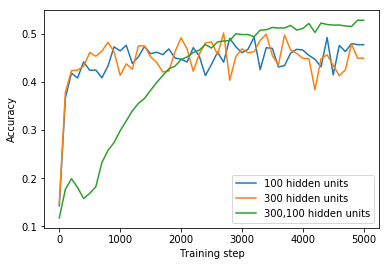

In [62]:
#Hidden units
folder_names = [LOG_DIR + 'mlp_numpy_20171112-1358/',
                LOG_DIR + 'mlp_numpy_20171112-1400/',
                LOG_DIR + 'mlp_numpy_20171112-1408/']

legend_names = ['100 hidden units',
                '300 hidden units',
                '300,100 hidden units']

plot(folder_names, legend_names)


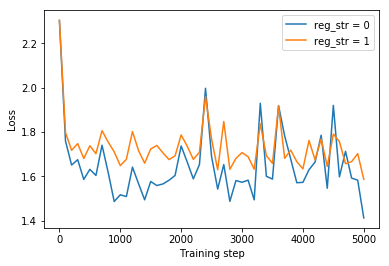

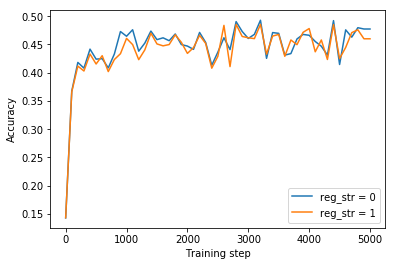

In [68]:
#Weight regularization units
folder_names = [LOG_DIR + 'mlp_numpy_20171112-1358/',
#                 LOG_DIR + 'mlp_numpy_20171112-1419/',
#                 LOG_DIR + 'mlp_numpy_20171112-1421/',
#                 LOG_DIR + 'mlp_numpy_20171112-1424/',
                LOG_DIR + 'mlp_numpy_20171112-1534/']

legend_names = ['reg_str = 0',
#                 'reg_str = 0.001',
#                 'reg_str = 0.01',
#                 'reg_str = 0.1',
                'reg_str = 1']

plot(folder_names, legend_names)

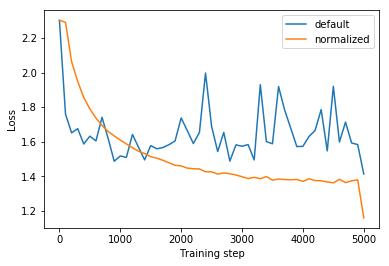

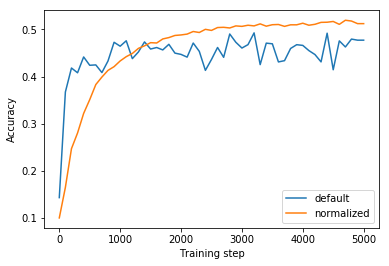

In [64]:
#Weight regularization units
folder_names = [LOG_DIR + 'mlp_numpy_20171112-1358/',
                LOG_DIR + 'mlp_numpy_20171112-1428/', ]

legend_names = ['default',
                'normalized']

plot(folder_names, legend_names)


In [79]:
a = np.random.randint(5, size = (10,10))
a

array([[3, 2, 0, 0, 3, 2, 1, 3, 4, 3],
       [0, 4, 4, 2, 3, 2, 0, 2, 0, 2],
       [0, 0, 2, 4, 3, 3, 3, 3, 2, 2],
       [4, 2, 1, 3, 4, 3, 3, 0, 1, 4],
       [4, 3, 2, 2, 0, 1, 2, 2, 1, 1],
       [0, 0, 3, 0, 4, 2, 1, 3, 1, 1],
       [1, 0, 0, 2, 4, 2, 3, 4, 1, 3],
       [1, 2, 4, 4, 0, 3, 4, 1, 2, 2],
       [3, 3, 3, 4, 0, 2, 2, 2, 4, 2],
       [4, 1, 1, 1, 0, 4, 2, 1, 1, 0]])

In [81]:
a = np.expand_dims(a, axis = 0)
a.shape

(1, 10, 10)

In [82]:
a = np.expand_dims(a, axis = 3)
a.shape

(1, 10, 10, 1)

In [83]:

y_pred = np.argmax(logits_value, axis = 1)
y_true = np.argmax(y, axis = 1)

y_pred = np.asarray([[0],[0],[0]])
y_true = np.asarray([[0],[1],[2]])

y_pred == y_true

array([[ True],
       [False],
       [False]], dtype=bool)

In [84]:
y_pred[y_pred == y_true] = 0

array([0])

In [87]:
a = np.asarray([2,1,6,5])
a.shape

(4,)

In [89]:
np.argsort(-a)

array([2, 3, 0, 1])